In [1]:
################# SATURDAYSAI #################
### Importación de las librerías necesarias ###
###############################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from collections import Counter

rcParams['figure.figsize'] = 14, 8.7 # Golden Mean
LABELS = ["1","2"]

from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

%matplotlib inline

# Carga de datos

In [2]:
### Importación de la Base de datos ###
file = "./EstudioPrevalencia2015.xlsx"
xl = pd.ExcelFile(file)

In [3]:
print(xl.sheet_names)

['Hoja1', 'BBDD fichero total', 'títulos y códigos']


In [4]:
df=xl.parse('BBDD fichero total')

In [5]:
# for column in df.columns:
#     print(str(column))
df.head(10)

,numero,modalidad,P0R1,P0B,POB1,P0B2,P0C,P0F1,POF2,POF3,...,DB4,DB5,DB6,DB6B,DB7,DB8,PESO,PESO1,revisadas_personales,revisadas_telefónicas
0,1006,1,9,4,4,32,1,1,1.0,2.0,...,4,2,2,NaN,1,3,1.128607,1.128607,NaN,NaN
1,1007,1,3,5,6,52,1,1,1.0,2.0,...,5,1,1,NaN,1,1,1.100234,1.100234,NaN,NaN
2,1008,1,4,5,8,67,2,1,1.0,2.0,...,100,4,5,NaN,1,4,1.196041,1.196041,NaN,NaN
3,1009,1,5,5,7,60,2,1,1.0,2.0,...,100,2,3,NaN,1,3,1.062141,1.062141,NaN,NaN
4,1010,1,5,5,6,51,2,1,1.0,2.0,...,5,2,3,NaN,1,3,1.062141,1.062141,NaN,1.0
5,1011,1,5,5,3,18,1,1,1.0,2.0,...,2,99,1,NaN,1,3,1.062141,1.062141,NaN,NaN
6,1012,1,5,5,4,27,2,1,1.0,1.0,...,4,1,1,NaN,1,3,0.720738,0.753777,NaN,NaN
7,1013,1,5,5,4,34,2,1,1.0,2.0,...,100,2,2,NaN,1,2,1.062141,1.062141,NaN,NaN
8,1014,1,5,5,7,62,1,1,2.0,NaN,...,100,2,3,NaN,1,2,1.062141,1.062141,NaN,NaN
9,1015,1,9,1,4,34,2,2,NaN,NaN,...,6,2,2,NaN,1,2,1.128607,1.128607,NaN,1.0


In [6]:
df.describe()

,numero,modalidad,P0R1,P0B,POB1,P0B2,P0C,P0F1,POF2,POF3,...,DB4,DB5,DB6,DB6B,DB7,DB8,PESO,PESO1,revisadas_personales,revisadas_telefónicas
count,6816.000000,6816.0,6816.000000,6816.000000,6816.000000,6816.000000,6816.000000,6816.000000,5202.000000,4669.000000,...,6816.000000,6816.000000,6816.000000,149.000000,6816.000000,6816.000000,6816.000000,6816.000000,660.0,1307.0
mean,4577.223738,1.0,8.456719,3.571156,5.777142,47.907864,1.516432,1.236796,1.102461,1.911544,...,39.057072,2.367811,2.843603,5.993289,1.098005,2.488116,1.050457,1.046409,1.0,1.0
std,2076.015852,0.0,4.826821,1.763138,1.626472,17.571003,0.499767,0.425147,0.303282,0.283987,...,46.042025,6.428943,6.887837,1.646030,2.087890,7.864340,0.181920,0.182712,0.0,0.0
min,1006.000000,1.0,1.000000,1.000000,3.000000,18.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,5.000000,1.000000,0.000000,0.175572,0.131613,1.0,1.0
25%,2777.750000,1.0,5.000000,2.000000,4.000000,34.000000,1.000000,1.000000,1.000000,2.000000,...,4.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.082998,1.082998,1.0,1.0
50%,4565.500000,1.0,9.000000,4.000000,6.000000,46.000000,2.000000,1.000000,1.000000,2.000000,...,5.000000,2.000000,2.000000,5.000000,1.000000,2.000000,1.107651,1.107651,1.0,1.0
75%,6359.250000,1.0,13.000000,5.000000,7.000000,62.000000,2.000000,1.000000,1.000000,2.000000,...,100.000000,2.000000,3.000000,7.000000,1.000000,3.000000,1.115778,1.115778,1.0,1.0
max,8240.000000,1.0,19.000000,6.000000,8.000000,95.000000,2.000000,2.000000,2.000000,2.000000,...,100.000000,100.000000,100.000000,16.000000,100.000000,100.000000,1.196041,1.196041,1.0,1.0


# Limpieza de los datos

In [ ]:
# Declaración de funciones para limpiar el Dataframe

def change_99_100(x):
    if (type(x) == int or type(x) == float) and x >= 99.0:
      return None
    else :
      return x

def change_column_P23(x):
    if (type(x) == int or type(x) == float) and x >= 2.0:
      return 2
    else :
      return 1

def cleanDataset(df):
  print("Tamaño del dataframe antes de limpieza ", df.shape)

  new_df = df[df['P23'] <= 3]
  print("Eliminadas filas que no han contestado a la variable objetivo ", new_df.shape )

  new_df = new_df.apply(change_99_100)
  print("Eliminados los valores de 99 o 100", new_df.shape)

  new_df['P23'] = new_df['P23'].apply(change_column_P23)
  print("Unificados Valores de P23 2 y 3 en solo 2", new_df.shape)

  new_df = new_df.dropna(axis=1, how='any')
  print("Eliminadas todas las columnas con al menos un valor nulo", new_df.shape)

  new_df = new_df.drop(['numero', 'modalidad'],1)
  print("Eliminadas columnas que no aportan valor ", new_df.shape)

#   new_df = new_df[['P0R1','P0B','POB1','P0C','P3','P4','P5','P6','P7','P8','P9','P11',
#                    'P13','P15A','P16A','P18A','P18B','P18C','P20','P20','P22','P24','P26',
#                    'P28','P29','P30','P31','P32','P33','P34','P35','P38SP1','P38SP2',
#                    'P38SP3','P38SP4','P38SP5','P38SP6','P38SP7','P38SP8','P38SP9',
#                    'P39','P41','P43','P46','DB0','DB1','DB3','DB4','DB5','DB6','DB7','DB8', 'P23'
#                   ]]
  print("Después del análisis del investigador dejamos las columnas más interesantes ", new_df.shape)

  return new_df

In [108]:
new_df = cleanDataset(df)
# new_df.describe()
print(type(new_df))
print(type(df))
# Variables del experto ya eliminadas previamente
# df[['P50', 'DB2', 'P47', 'P38SP10', 'POF3']].describe()

Tamaño del dataframe antes de limpieza  (6816, 240)
Eliminadas filas que no han contestado a la variable objetivo  (5159, 240)
Eliminados los valores de 99 o 100 (5159, 240)
Unificados Valores de P23 2 y 3 en solo 2 (5159, 240)
Eliminadas todas las columnas con al menos un valor nulo (5159, 127)
Eliminadas columnas que no aportan valor  (5159, 125)
Después del análisis del investigador dejamos las columnas más interesantes  (5159, 125)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
### Número de valores únicos en cada columna ###
# print(new_df.nunique())

# Análisis estadístico

In [ ]:
new_df.columns

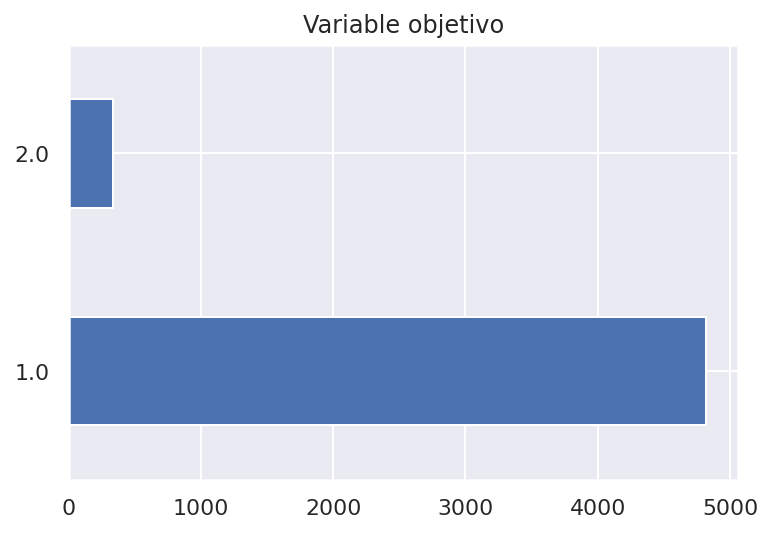

In [ ]:
### Variable Objetivo ###
plot= new_df['P23'].value_counts().plot(kind='barh', title="Variable objetivo") 

In [ ]:
### Tabla Variable objetivo - Comunidad autónoma ###
pd.crosstab(new_df['P23'], new_df['P0R1'], margins=True)


In [ ]:
sns.set()
%config InlineBackend.figure_format='retina'
sns.countplot(x='P0R1', hue='P23', data=new_df);

In [ ]:
new_df['P23'].unique()

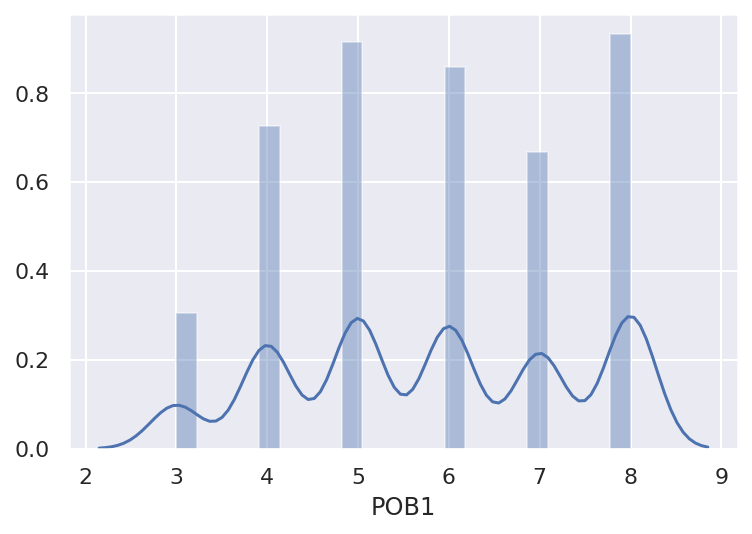

In [ ]:
### Histograma de la edad ###
sns.distplot(new_df['POB1'])

(array([ 357.,    0.,  850.,    0.,    0., 1071.,    0., 1006.,  783.,
        1092.]),
 array([1.09861229, 1.19669521, 1.29477814, 1.39286106, 1.49094399,
        1.58902692, 1.68710984, 1.78519277, 1.88327569, 1.98135862,
        2.07944154]),
 <a list of 10 Patch objects>)

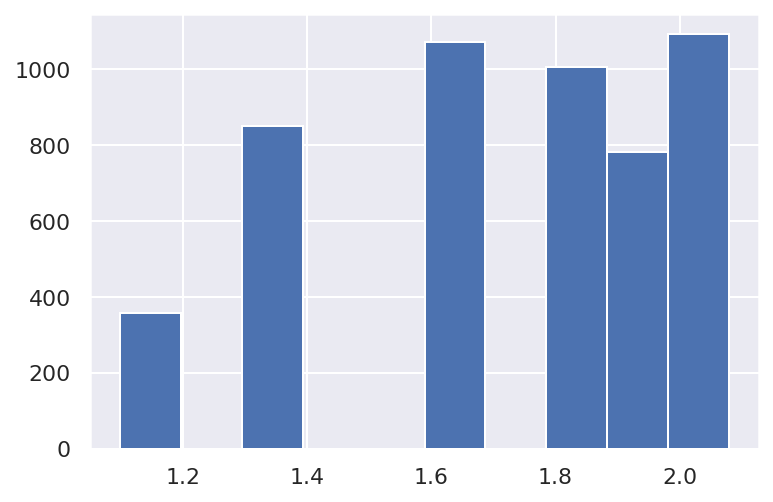

In [ ]:
### Histograma ###
log_edad = np.log(new_df['POB1'])
plt.hist(log_edad)

In [ ]:
### Histograma del sexo ###
sns.distplot(new_df['P0C'])

In [ ]:
### Histograma Estado de Salud ###
sns.distplot(new_df['P28'])

In [ ]:
print(*new_df.columns.to_list(), sep=', ')
# print(new_df.columns.to_list())

P0R1, P0B, POB1, P0C, P3, P4, P5, P6, P7, P8, P9, P11, P13, P15A, P16A, P18A, P18B, P18C, P20, P20, P22, P24, P26, P28, P29, P30, P31, P32, P33, P34, P35, P38SP1, P38SP2, P38SP3, P38SP4, P38SP5, P38SP6, P38SP7, P38SP8, P38SP9, P39, P41, P43, P46, DB0, DB1, DB3, DB4, DB5, DB6, DB7, DB8, P23


In [ ]:
new_df= new_df[Datos]
new_df.head()

In [ ]:
# new_df.shape

In [ ]:
new_df.dtypes

P0R1        int64
P0B         int64
POB1        int64
P0C         int64
P3        float64
P4        float64
P5        float64
P6        float64
P7        float64
P8        float64
P9        float64
P11       float64
P13       float64
P15A      float64
P16A      float64
P18A        int64
P18B        int64
P18C        int64
P20         int64
P20         int64
P22       float64
P24       float64
P26         int64
P28         int64
P29         int64
P30         int64
P31         int64
P32         int64
P33         int64
P34         int64
P35         int64
P38SP1      int64
P38SP2      int64
P38SP3      int64
P38SP4      int64
P38SP5      int64
P38SP6      int64
P38SP7      int64
P38SP8      int64
P38SP9      int64
P39         int64
P41         int64
P43         int64
P46         int64
DB0         int64
DB1         int64
DB3         int64
DB4         int64
DB5         int64
DB6         int64
DB7         int64
DB8         int64
P23         int64
dtype: object

In [ ]:
# new_df.isnull().sum()

In [ ]:
new_df=new_df.dropna()

In [ ]:
new_df.describe()

,P0R1,P0B,POB1,P0C,P46,DB0,DB1,DB3,DB4,DB5,DB6,DB7,DB8,P23
count,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000,5159.000000
mean,8.170576,3.560380,5.830393,1.490599,8.680364,2.895910,2.659624,25.786393,33.153324,2.328552,2.825160,1.041481,2.353557,1.065710
std,5.048003,1.758982,1.568310,0.499960,3.938258,2.830794,6.139870,41.104046,43.922112,5.984180,6.473831,0.199419,7.049362,0.247799
min,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,3.000000,2.000000,5.000000,1.000000,8.000000,2.000000,1.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,9.000000,4.000000,6.000000,1.000000,9.000000,3.000000,1.000000,4.000000,5.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,13.000000,5.000000,7.000000,2.000000,10.000000,3.000000,4.000000,5.000000,99.000000,2.000000,3.000000,1.000000,3.000000,1.000000
max,19.000000,6.000000,8.000000,2.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,2.000000,100.000000,2.000000


In [91]:
### Relaciones entre las features ###
correlation = new_df.corr()
display(correlation)
plt.figure(figsize=(14, 12))

,P0R1,P0B,POB1,P0C,P3,P4,P5,P6,P7,P8,...,P46,DB0,DB1,DB3,DB4,DB5,DB6,DB7,DB8,P23
P0R1,1.000000,0.081504,0.007794,-0.028402,-0.070879,0.003193,0.012897,0.011945,0.001595,0.023298,...,-0.022115,0.017116,-0.006708,0.103939,0.120185,0.010942,-0.019756,0.061147,0.000958,0.088680
P0B,0.081504,1.000000,0.019631,0.000150,-0.035261,0.058765,0.027551,-0.008665,-0.004954,0.053880,...,-0.021996,0.039128,0.012656,0.029350,0.053335,-0.003165,-0.003295,0.012203,-0.017263,0.002683
POB1,0.007794,0.019631,1.000000,0.074493,-0.002400,0.017062,0.009091,0.021512,-0.019607,0.017978,...,-0.048079,-0.123370,0.128538,0.065753,-0.023110,0.072746,0.130784,-0.086602,-0.044185,-0.005240
P0C,-0.028402,0.000150,0.074493,1.000000,-0.033179,-0.012790,-0.032968,0.018039,-0.020941,-0.011015,...,-0.000296,-0.020212,0.046831,-0.024334,-0.019600,0.022125,0.003685,-0.003866,-0.022105,-0.044307
P3,-0.070879,-0.035261,-0.002400,-0.033179,1.000000,0.125164,0.197892,-0.010421,0.166846,0.082433,...,0.026900,-0.011612,0.024638,0.026291,0.038950,0.024676,-0.006613,0.007777,-0.008563,0.020043
P4,0.003193,0.058765,0.017062,-0.012790,0.125164,1.000000,0.190338,0.051284,0.128157,0.448863,...,0.001432,0.000684,0.041798,-0.009477,-0.001304,-0.000187,0.000389,0.009882,-0.006481,0.018984
P5,0.012897,0.027551,0.009091,-0.032968,0.197892,0.190338,1.000000,0.038600,0.176246,0.246549,...,-0.011105,-0.005445,0.030662,0.052972,0.061231,-0.006297,-0.003466,0.013070,-0.007408,0.014799
P6,0.011945,-0.008665,0.021512,0.018039,-0.010421,0.051284,0.038600,1.000000,0.046888,0.121709,...,-0.010135,-0.016658,0.001962,0.003542,0.031103,0.067785,0.000594,0.031446,0.050815,0.009076
P7,0.001595,-0.004954,-0.019607,-0.020941,0.166846,0.128157,0.176246,0.046888,1.000000,0.149498,...,0.001865,0.090139,0.069985,0.026939,0.029582,0.072759,-0.009210,0.007241,0.065845,0.003903
P8,0.023298,0.053880,0.017978,-0.011015,0.082433,0.448863,0.246549,0.121709,0.149498,1.000000,...,-0.004168,-0.001731,0.050062,0.015947,0.026065,-0.001101,0.004133,0.000181,-0.006301,0.049077


<Figure size 1008x864 with 0 Axes>

<Figure size 1008x864 with 0 Axes>

In [ ]:
### Relaciones entre las features ###
correlation = new_df.corr()
display(correlation)
plt.figure(figsize=(14, 12))
import seaborn as sns
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [ ]:
new_df["P23"].value_counts()

1.0    4820
2.0     339
Name: P23, dtype: int64

In [ ]:
plot= new_df["P23"].value_counts().plot(kind='barh', title="Dependiente") 

# Creación de los conjuntos de Train y Test

In [ ]:
y = new_df['P23']
X = new_df.drop('P23', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [110]:
print('X train Shape: ' , X_train.shape, '; Y train Shape: ' , y_train.shape)
print('X test Shape: ' , X_test.shape, '; Y test Shape: ' , y_test.shape)

X train Shape:  (3611, 124) ; Y train Shape:  (3611,)
X test Shape:  (1548, 124) ; Y test Shape:  (1548,)


# Generación de datos sintéticos

In [111]:
### Balanceo SMOTE ###
from imblearn.combine import SMOTETomek

os_us = SMOTETomek()
X_train_res, y_train_res = os_us.fit_sample(X_train, y_train)

print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(Counter(y_train_res)))

Distribution of class labels before resampling Counter({1: 3365, 2: 246})
Distribution of class labels after resampling Counter({1: 3363, 2: 3363})


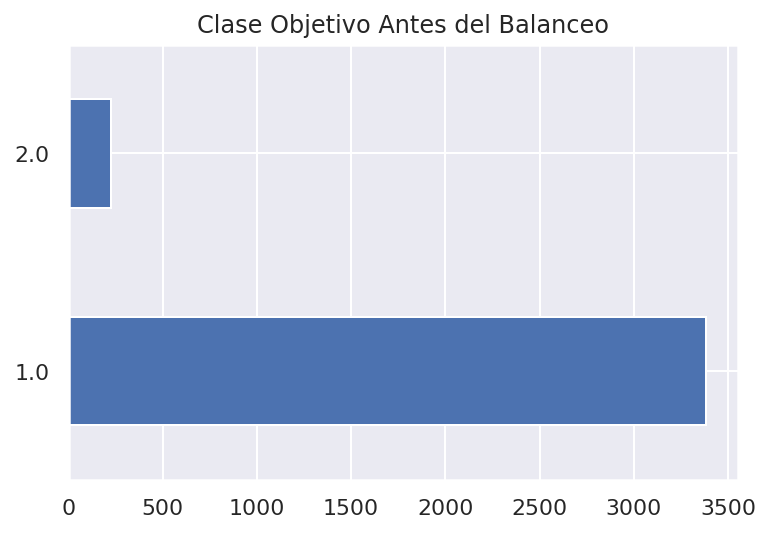

In [60]:
plot= y_train.value_counts().plot(kind='barh', title="Clase Objetivo Antes del Balanceo") 

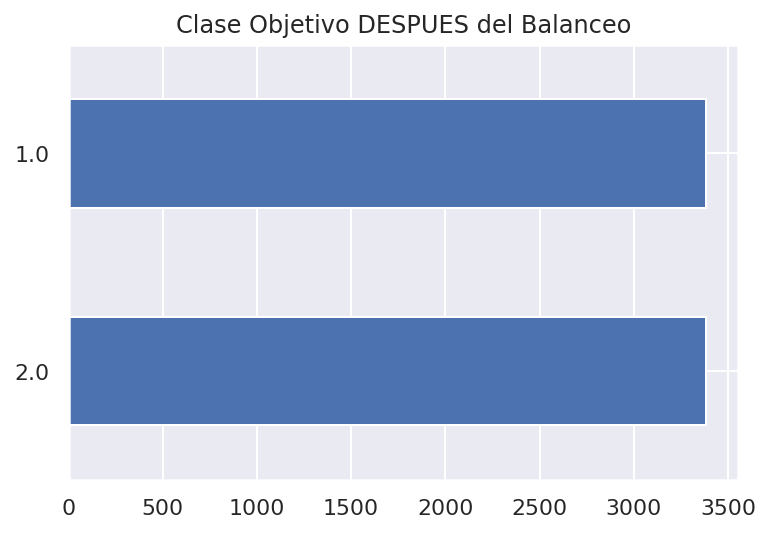

In [61]:
plot= y_train_res.value_counts().plot(kind='barh', title="Clase Objetivo DESPUES del Balanceo") 

# Entrenamiento y Evaluación de Modelos

In [ ]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))
    
#     Modelos de Regresión Lineal
def run_Logistic_Regression_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base
 
model = run_Logistic_Regression_model(X_train_res, X_test, y_train_res, y_test)
    

/home/bruce/pythonproyects/saturdays-ai-env/lib/python3.6/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [ ]:
### Random Forest Classifier ###
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

def get_mae_rf(num_est, predictors_train, predictors_val, targ_train, targ_val):
    
    # fitting model with input max_leaf_nodes
    model = RandomForestClassifier(n_estimators=num_est, random_state=0,  bootstrap = True,verbose=1,
                               max_features = 'sqrt')

    # fitting the model with training dataset
    model.fit(predictors_train, targ_train)

    # making prediction with the test dataset
    preds_val = model.predict(predictors_val)

    # calculate and return the MAE
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)

In [ ]:
plot_mae = {}
for num_est  in range(2,50):
    my_mae = get_mae_rf(num_est,X_train_res,X_test,y_train_res,y_test)
    plot_mae[num_est] = my_mae

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

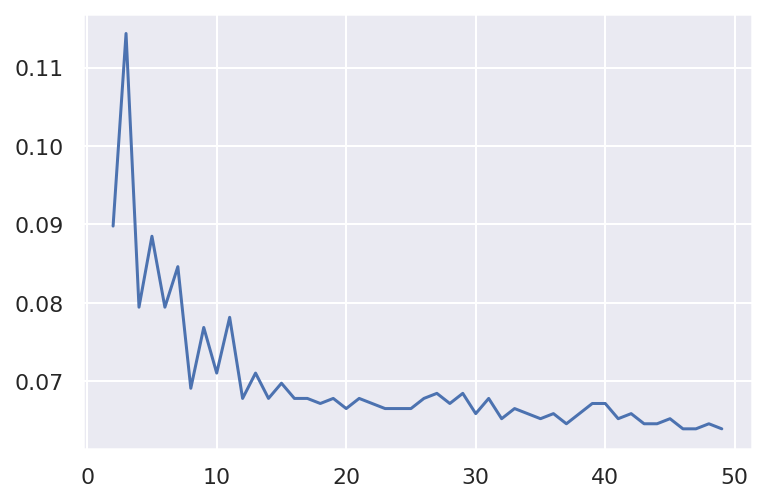

In [ ]:
plt.plot(list(plot_mae.keys()),list(plot_mae.values()))
plt.show()

In [69]:
 # fitting model with input max_leaf_nodes
model = RandomForestClassifier(n_estimators=20, random_state=0,  bootstrap = True,verbose=2,
                           max_features = 'sqrt')

# fitting the model with training dataset
model.fit(X_train, y_train)

building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=2,
                       warm_start=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


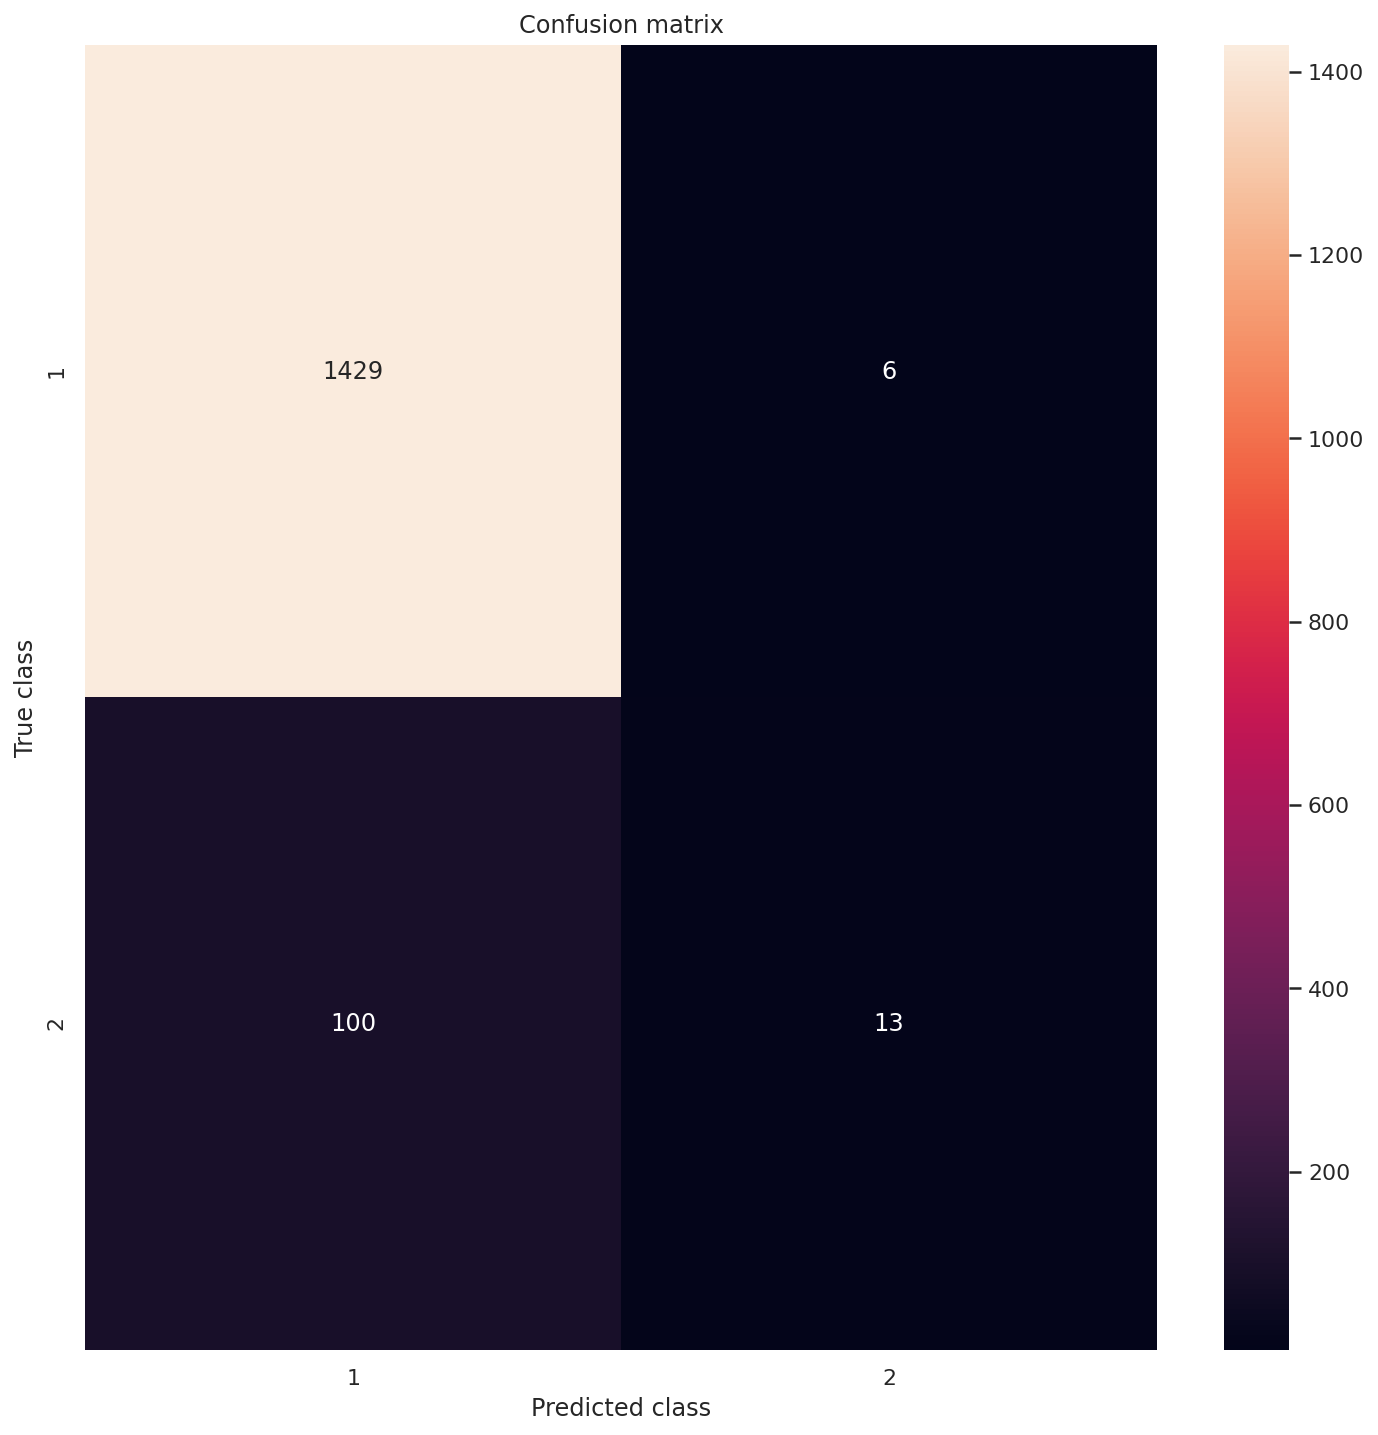

              precision    recall  f1-score   support

         1.0       0.94      1.00      0.97      1453
         2.0       0.00      0.00      0.00        95

    accuracy                           0.94      1548
   macro avg       0.47      0.50      0.48      1548
weighted avg       0.88      0.94      0.91      1548



In [ ]:
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

In [ ]:
### Balanceo SMOTE ###

os_us = SMOTETomek()
X_train_res, y_train_res = os_us.fit_sample(X_train, y_train)

print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(Counter(y_train_res)))

In [ ]:
plot= y_train.value_counts().plot(kind='barh', title="Dependiente") 

In [ ]:
plot= y_train_res.value_counts().plot(kind='barh', title="Dependiente") 

In [ ]:
model = run_Logistic_Regression_model(X_train_res, X_test, y_train_res, y_test)

/home/bruce/pythonproyects/saturdays-ai-env/lib/python3.6/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


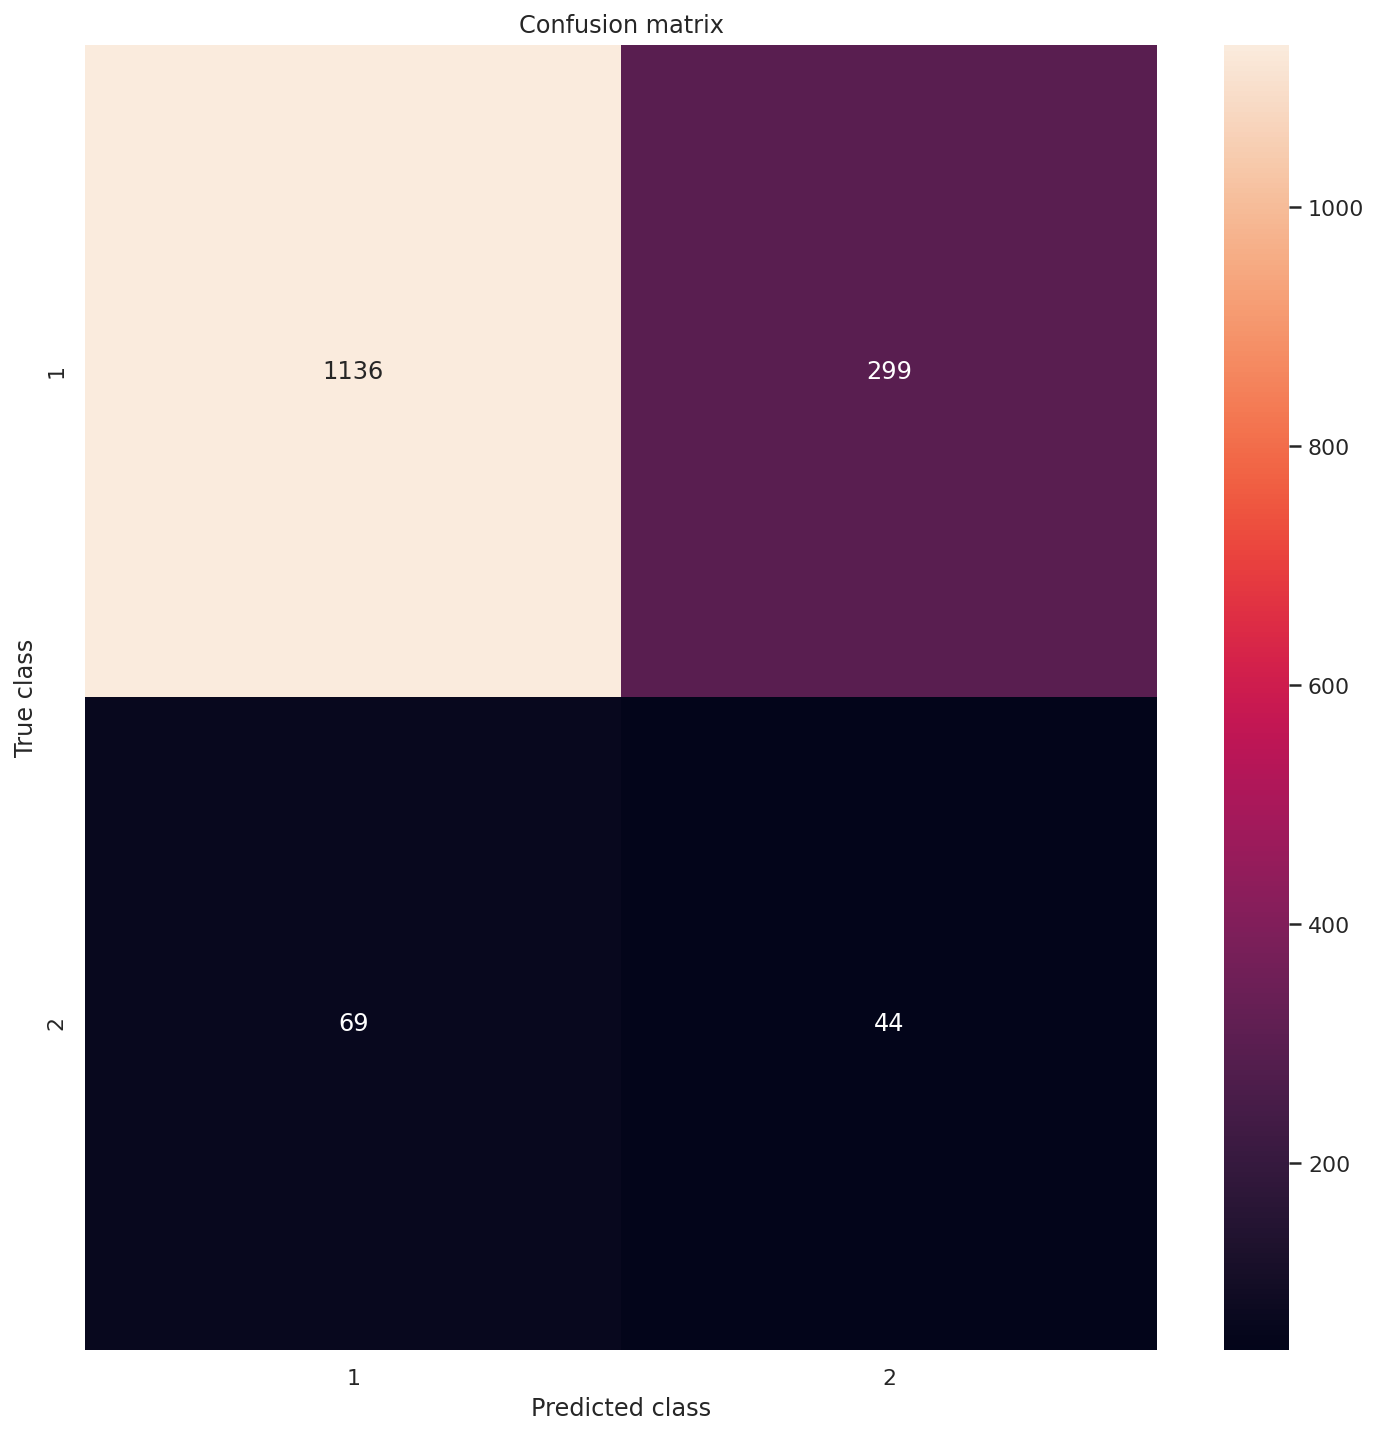

              precision    recall  f1-score   support

         1.0       0.94      0.66      0.78      1453
         2.0       0.07      0.40      0.12        95

    accuracy                           0.65      1548
   macro avg       0.51      0.53      0.45      1548
weighted avg       0.89      0.65      0.74      1548



In [ ]:
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

In [23]:
# Análisis de componentes principales

scaler = StandardScaler()
pca = PCA(n_components=0.9, random_state=RANDOM_STATE)

x = new_df.drop('P23', axis=1)
x = scaler.fit_transform(x)


[-1.02438066e+00  8.18518720e-01  1.08156534e-01  2.23605827e-01
 -9.81371388e-01  0.00000000e+00 -3.38371942e-01 -9.59325661e-02
  5.65249206e-01 -1.06905416e-01 -8.88772855e-02 -1.65348915e-01
 -2.17527292e-01 -5.14259352e-02 -9.64307305e-02 -6.39171902e-02
 -4.53285296e-02 -1.44894735e-01 -6.25019022e-02 -9.06923343e-02
 -5.10952202e-02 -6.07393268e-02 -4.09287541e-02 -6.64758176e-02
 -3.96651563e-02 -3.03788174e-02 -2.80031683e-02 -4.34862376e-02
 -2.52881205e-02 -3.02196099e-02 -3.51797841e-02 -3.60023469e-02
 -5.06686866e-02 -5.73837213e-02 -3.64340070e-02 -2.42857173e-02
 -3.38205588e-02 -1.25113075e-01 -1.21993428e-01 -4.83116166e-02
 -9.93585637e-03 -1.85176459e-01  1.54350248e-02 -4.39114061e-02
 -4.13260863e-01  1.44692185e+00  3.16292348e+00 -5.72243560e-02
 -6.55594139e-02 -7.40425983e-02 -4.55360398e-02 -1.48953430e-01
 -6.18984286e-02 -1.83378437e-01 -5.84457325e-02 -7.41846618e-02
 -4.85611058e-02 -6.95790648e-02 -1.67813997e-01 -5.83197133e-02
 -4.67539180e-02 -6.46398